# Conditional Probability Activity & Exercise

Below is some code to create some fake data on how much stuff people purchase given their age range.

It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's.

It then assigns a lower probability for young people to buy stuff.

In the end, we have two Python dictionaries:

"totals" contains the total number of people in each age group.
"purchases" contains the total number of things purchased by people in each age group.
The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.

Let's run it and have a look:

In [1]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = float(ageDecade) / 100.0
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

In [2]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [3]:
purchases

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [4]:
totalPurchases

45012

Let's play with conditional probability.

First let's compute P(E|F), where E is "purchase" and F is "you're in your 30's". The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something:

In [6]:
PEF = float(purchases[30]) / float(totals[30])
print('P(purchase | 30s): ' + str(PEF))

P(purchase | 30s): 0.29929598652145134


P(F) is just the probability of being 30 in this data set:

In [7]:
PF = float(totals[30]) / 100000.0
print("P(30's): " +  str(PF))

P(30's): 0.16619


And P(E) is the overall probability of buying something, regardless of your age:

In [8]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.45012


If E and F were independent, then we would expect P(E | F) to be about the same as P(E). But they're not; PE is 0.45, and P(E|F) is 0.3. So, that tells us that E and F are dependent (which we know they are in this example.)

What is P(E)P(F)?

In [9]:
print("P(30's)P(Purchase)" + str(PE * PF))

P(30's)P(Purchase)0.07480544280000001


P(E,F) is different from P(E|F). P(E,F) would be the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's:

In [10]:
print("P(30's, Purchase)" + str(float(purchases[30]) / 100000.0))

P(30's, Purchase)0.04974


P(E,F) = P(E)P(F), and they are pretty close in this example. But because E and F are actually dependent on each other, and the randomness of the data we're working with, it's not quite the same.

We can also check that P(E|F) = P(E,F)/P(F) and sure enough, it is:

In [11]:
print((purchases[30] / 100000.0) / PF)

0.29929598652145134


## Your Assignment

Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.


# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the field of data science:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. NumPy arrays are mainly important because of...

## Scikit_Learn
The machine learning library we'll use throughout this course is scikit_learn, or sklearn, and it generally takes NumPy arrays as its input.

So, a typical thing to do is to load, clean, and manipulate your input data using Pandas. Then convert your Pandas DataFrame into a NumPy array as it's being passed into some Scikit_Learn function. That conversion can often happen automatically.

Let's start by loading some comma-separated value data using Pandas into a DataFrame:


In [ ]:
%matplotlib inline # every plot will be displayed inline and NOT in an external window
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv") # read in .csv file
df.head()

head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [ ]:
df.head(10)

You can also view the end of your data with tail():

In [ ]:
df.tail(4)

We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [ ]:
df.shape

The total size of the data frame is the rows * columns:

In [ ]:
df.size

The len() function gives you the number of rows in a DataFrame:

In [ ]:
len(df)

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [ ]:
df.columns

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [ ]:
df['Hired']

You can also extract a given range of rows from a named column, like so:

In [ ]:
df['Hired'][:5]

Or even extract a single value from a specified column / row combination:

In [ ]:
df['Hired'][5]

To extract more than one column, you pass in an array of column names instead of a single one:

In [ ]:
df[['Years Experience', 'Hired']]

You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [ ]:
df[['Years Experience', 'Hired']][:5]

Sorting your DataFrame by a specific column looks like this:

In [ ]:
df.sort_values(['Years Experience'])

You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [ ]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

In [ ]:
degree_counts.plot(kind='bar')

## Exercise

Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

# Exercise: Mean & Median Customer Spend

Here's some code that will generate some random e-commerce data; just an array of total amount spent per transaction. Select the code block, and hit "play" to execute it:

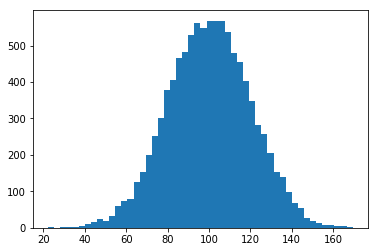

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 20.0, 10000)

plt.hist(incomes, 50)
plt.show()

Now, find the mean and median of this data. In the code block below, write your code, and see if your result makes sense:

In [8]:
np.median(incomes)

100.20345818808576

This is pretty much the world's easiest assignment, but we're just trying to get your hands on iPython and writing code with numpy to get you comfortable with it.

Try playing with the code above to generate different distributions of data, or add outliers to it to see their effect.

In [9]:
np.mean(incomes)

100.21748915728689

# Examples of Data Distributions

## Uniform Distribution

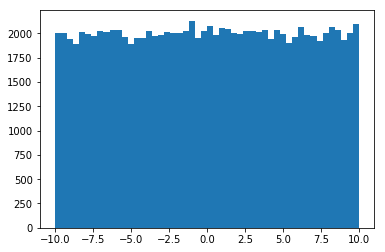

In [2]:
# has equal propbability of values
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

values = np.random.uniform(-10.0, 10.0, 100000)
plt.hist(values, 50)
plt.show()

## Normal / Gaussian

Visualize the probability density function:

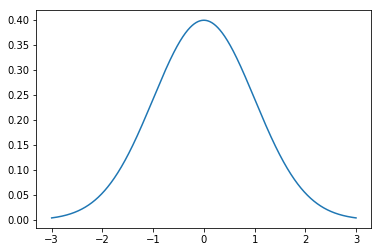

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # normal density function for normal distribution


Generate some random numbers with a normal distribution. "mu" is the desired mean, "sigma" is the standard deviation:

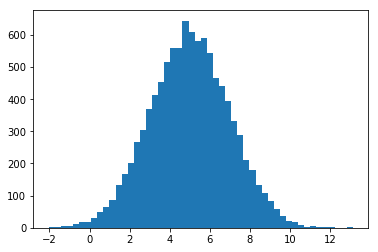

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

## Exponential Probablity Distribution Function/ "Power Law"

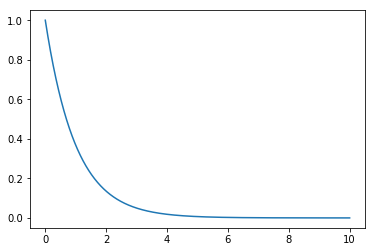

In [5]:
from scipy.stats import expon
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))

## Binomial Probability Mass Function

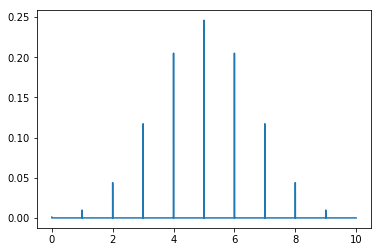

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 10, 0.5
x = np.arange(0, 10, 0.001)
plt.plot(x, binom.pmf(x, n, p))

## Poisson Probability Mass Function

Example: My website gets on average 500 visits per day. What's the odds of getting 550?

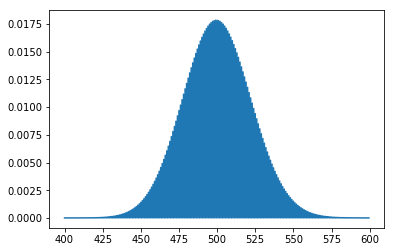

In [6]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))

## Pop Quiz!

What's the equivalent of a probability distribution function when using discrete instead of continuous data?

In [ ]:
# Probability mass functions!

# Moments: Mean, Variance, Skew, Kurtosis

Create a roughly normal-distributed random set of data:

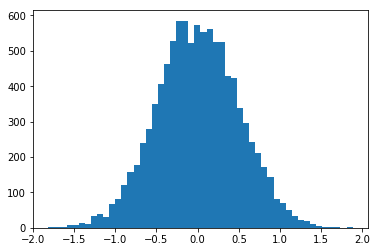

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

The **first moment** is the mean; this data should average out to about 0:

In [2]:
np.mean(vals)

0.002501312246277769

The **second moment** is the variance:

In [3]:
np.var(vals)

0.24617796172106618

The **third moment** is skew - since our data is nicely centered around 0, it should be almost 0:

In [4]:
import scipy.stats as sp
sp.skew(vals)

0.0030938517427903625

The **fourth moment** is "kurtosis", which describes the shape of the tail. For a normal distribution, this is 0:

In [5]:
sp.kurtosis(vals)

-0.05255630887361118

## Activity

Understanding skew: change the normal distribution to be centered around 10 instead of 0, and see what effect that has on the moments.

The skew is still near zero; skew is associated with the shape of the distribution, not its actual offset in X.

In [ ]:
# Conditional Probability Solution

First we'll modify the code to have some fixed purchase probability regardless of age, say 40%:

In [1]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = 0.4
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

Next we will compute P(E|F) for some age group, let's pick 30 year olds again:

In [2]:
PEF = float(purchases[30]) / float(totals[30])
print("P(purchase | 30s): " + str(PEF))

P(purchase | 30s): 0.3987604549010169


Now we'll compute P(E)

In [3]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.4003


P(E|F) is pretty darn close to P(E), so we can say that E and F are likely indepedent variables.

# Mean, Median, Mode, and introducing NumPy

## Mean vs. Median

Let's create some fake income data, centered around 27,000 with a normal distribution and standard deviation of 15,000, with 10,000 data points. (We'll discuss those terms more later, if you're not familiar with them.)

Then, compute the mean (average) - it should be close to 27,000:

In [9]:
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
np.mean(incomes)

26788.049166701807

We can segment the income data into 50 buckets, and plot it as a histogram:

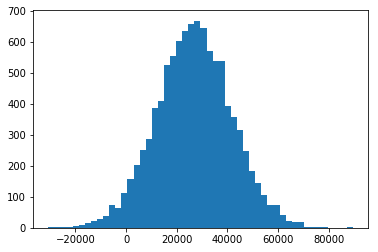

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

Now compute the median - since we have a nice, even distribution it too should be close to 27,000:

In [17]:
np.median(incomes)

26791.765033930664

Now we'll add Donald Trump into the mix. Darn income inequality!

In [18]:
incomes = np.append(incomes, [1000000000])

The median won't change much, but the mean does:

In [19]:
np.median(incomes)

26794.99683673129

In [20]:
np.mean(incomes)

226742.70062657652

## Mode

Next, let's generate some fake age data for 500 people:

In [25]:
ages = np.random.randint(18, high=90, size=500)
ages

array([20, 49, 37, 23, 68, 38, 72, 88, 35, 37, 22, 84, 75, 70, 19, 73, 18,
       67, 43, 84, 24, 56, 26, 19, 31, 46, 82, 19, 46, 43, 64, 25, 60, 50,
       24, 38, 36, 59, 82, 57, 76, 53, 38, 62, 34, 22, 32, 34, 42, 39, 21,
       35, 84, 36, 67, 54, 43, 19, 35, 59, 31, 61, 58, 78, 53, 62, 62, 71,
       89, 64, 20, 47, 34, 64, 20, 48, 41, 18, 32, 36, 35, 86, 24, 58, 33,
       33, 25, 73, 69, 28, 19, 22, 66, 87, 29, 56, 29, 36, 41, 67, 61, 62,
       22, 49, 83, 22, 42, 69, 80, 78, 52, 75, 69, 19, 71, 77, 89, 33, 73,
       64, 71, 29, 60, 41, 19, 62, 77, 61, 22, 46, 76, 87, 26, 26, 32, 64,
       85, 64, 29, 44, 60, 34, 41, 79, 81, 52, 22, 89, 35, 45, 88, 31, 65,
       24, 19, 24, 44, 66, 29, 87, 68, 43, 42, 83, 18, 69, 42, 83, 88, 80,
       59, 43, 84, 45, 31, 18, 75, 67, 63, 78, 81, 43, 30, 48, 74, 76, 18,
       47, 26, 82, 35, 48, 31, 79, 89, 57, 39, 74, 25, 78, 65, 53, 36, 39,
       68, 41, 46, 67, 19, 75, 35, 50, 18, 40, 88, 67, 41, 82, 46, 56, 24,
       39, 64, 36, 51, 31

In [26]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=array([19]), count=array([16]))

# Standard Deviation and Variance

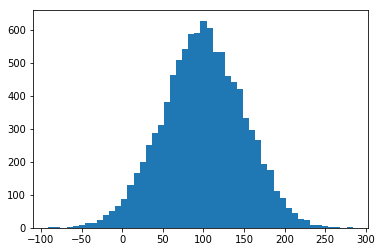

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 50.0, 10000)

plt.hist(incomes, 50)
plt.show()

In [22]:
incomes.std()

49.77773669737164

In [23]:
incomes.var()

2477.8230707128587

## Activity

Experiment with different parameters on the normal function, and see what effect it has on the shape of the distribution. How does that new shape relate to the standard deviation and variance?

# Percentiles

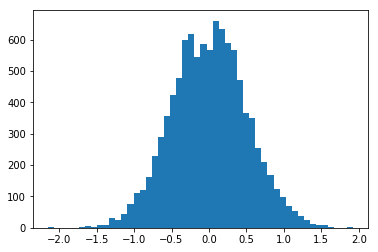

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

In [2]:
np.percentile(vals, 50) # another name for median

0.008385303796967787

In [3]:
np.percentile(vals, 90) # 90 percent is less of the given value

0.644739082291991

In [4]:
np.percentile(vals, 20) # 20 percent are less than a certain number

-0.4199564373196273

## Activity

Experiment with different parameters when creating the test data. What effect does it have on the percentiles?

In [5]:
np.percentile(vals, 10)

-0.6347534747327968

# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

0.024071079632311507

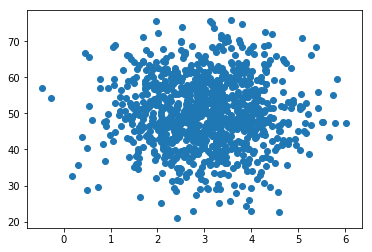

In [2]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)


Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

-7.874770053556831

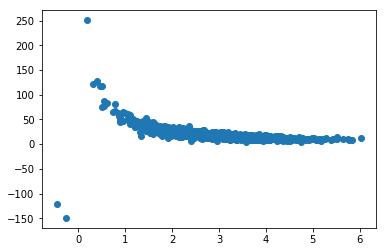

In [3]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [5]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

-0.5190729565113626

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [4]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.51855388],
       [-0.51855388,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

-1.0010010010010009

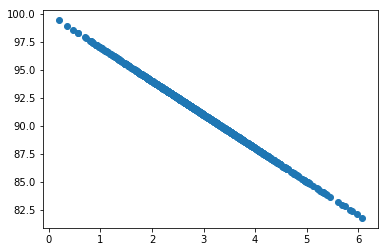

In [5]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

In [6]:
np.cov(pageSpeeds, purchaseAmount)

array([[  0.96057829,  -7.87477005],
       [ -7.87477005, 240.07957524]])